# 2.tweets preprocessing and cleaning

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings

warnings.filterwarnings("ignore",category=DeprecationWarning)

%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test_tweets.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


## A) Removing twitter handles(@user)

In [4]:
combi=train.append(test,ignore_index=True)

C:\Users\MY\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


In [5]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [6]:
#remove twitter handles(@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")

In [7]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


## B) removing punctuations,numbers and special characters

In [8]:
#remove special characters,numbers,punctuations
combi['tidy_tweet']=combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [9]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation


## C) removing short words

In [10]:
combi['tidy_tweet']=combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [11]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


## D) tokenization

In [12]:
tokenized_tweet=combi['tidy_tweet'].apply(lambda x:x.split())

In [13]:
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

## E) stemming

In [14]:
from nltk.stem.porter import *
stemmer=PorterStemmer()

#stemming
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

In [15]:
tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [16]:
#now stitch these tokens back together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])

combi['tidy_tweet']=tokenized_tweet

In [17]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


# 3.story generation and visualization from tweets

## A) understanding the common words used in tweets:worldcloud

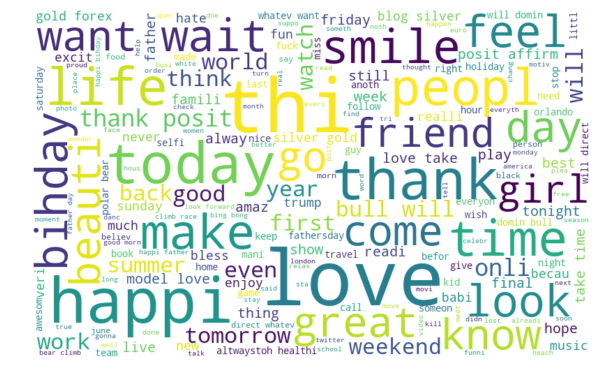

In [54]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white').generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## B) Words in non racist/sexist tweets

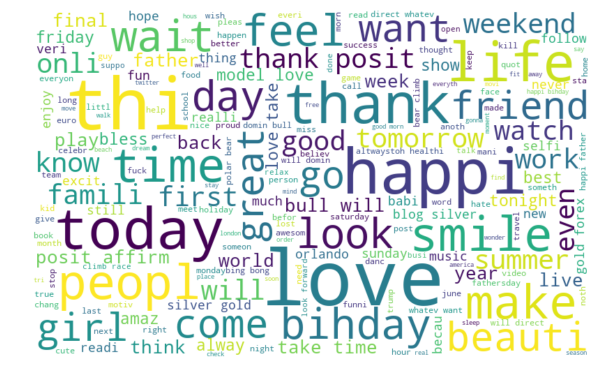

In [55]:
normal_words=' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])

wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110,background_color='white').generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## C) Racist/Sexist Tweets

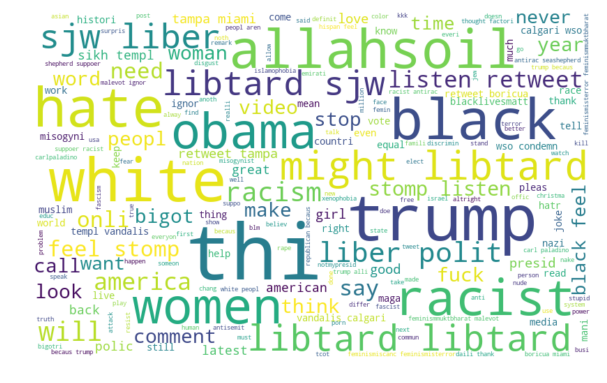

In [53]:
negative_words=' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110,background_color='white').generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

## D) Understanding the impact of hashtag on tweets sentiment

In [26]:
#function to collect hashtags
def hashtag_extract(x):
    hashtags=[]
    #loop over the words in the tweet
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
        
    return hashtags

In [27]:
#hashtags for non racist/sexist

HT_regular=hashtag_extract(combi['tidy_tweet'][combi['label']==0])

#hashtags for racist/sexist
HT_negative=hashtag_extract(combi['tidy_tweet'][combi['label']==1])

In [52]:
# HT_regular

In [29]:
#unnesting list
HT_regular=sum(HT_regular,[])
HT_negative=sum(HT_negative,[])

In [51]:
# HT_regular

In [50]:
# HT_negative

## plot the top n hashtags
## Non-racist/sexist tweets

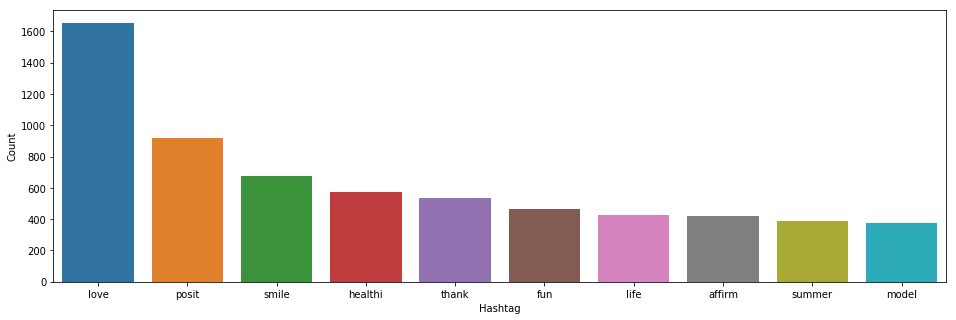

In [34]:
a=nltk.FreqDist(HT_regular)
d=pd.DataFrame({'Hashtag':list(a.keys()),
                'Count':list(a.values())})
#selecting top 10 most frequent hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

## Racist/sexist tweets

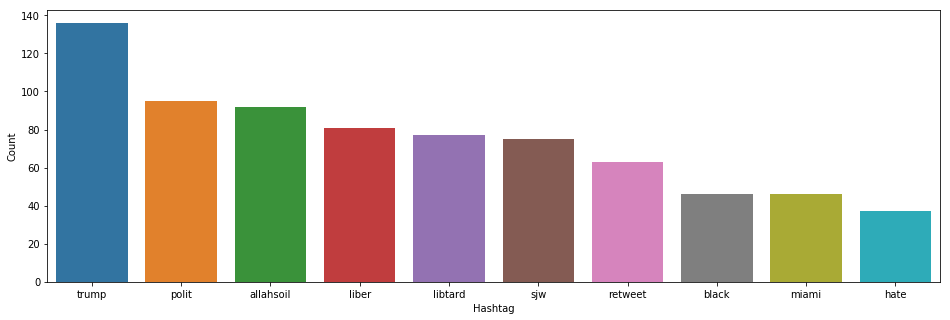

In [35]:
a=nltk.FreqDist(HT_negative)
d=pd.DataFrame({'Hashtag':list(a.keys()),
                'Count':list(a.values())})
#selecting top 10 most frequent hashtags
d=d.nlargest(columns='Count',n=10)
plt.figure(figsize=(16,5))
ax=sns.barplot(data=d,x='Hashtag',y='Count')
ax.set(ylabel='Count')
plt.show()

## 4. extracting features from cleaned tweets

### bag-of-words features

In [36]:
#set the parameter max_features = 1000 to select only top 1000 terms ordered by term frequency across the corpus
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
#bag_of_words feature matrix
bow=bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [49]:
# print(bow)

### Tf-idf features

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
#tf-idf feature matrix
tfidf=tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [48]:
# print(tfidf)

## 5. model building: sentiment analysis

## A) building model using bag-of-words features

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow=bow[:31962,:]
test_bow=bow[31962:,:]

#spliting data into training and validation set
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)

lreg=LogisticRegression()
lreg.fit(xtrain_bow,ytrain)

prediction=lreg.predict_proba(xvalid_bow)
#if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)

#calculating f1 score
f1_score(yvalid,prediction_int)

0.5307820299500832

In [46]:
#prediction on test data
test_pred=lreg.predict_proba(test_bow)
test_pred_int=test_pred[:,1]>=0.3
test_pred_int=test_pred_int.astype(np.int)
test['label']=test_pred_int
submission=test[['id','label']]
submission.to_csv('sub_lreg_bow.csv',index=False)

## Building model using TF_IDF features

In [47]:
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]

xtrain_tfidf=train_tfidf[ytrain.index]
xvalid_tfidf=train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf,ytrain)

prediction=lreg.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)

f1_score(yvalid,prediction_int)

0.5446507515473032